# Comparison: H/L=0.139 with wikipedia limit

Limit approximation from [wikipedia, and its (present) ref 35](https://en.wikipedia.org/wiki/Stokes_wave#Highest_wave) with y center of gravity adjusted to zero.

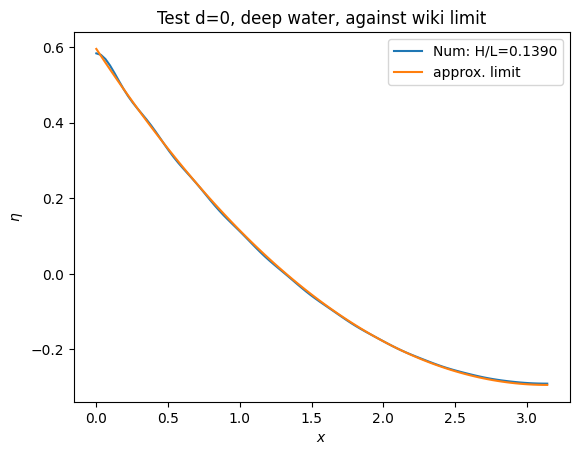

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root

from waterwaves import unpack,IEj,wave
X=np.linspace(0,np.pi,100)
N,d=20,0

H=0.139*2*np.pi # wavelength L is 2pi, so H/L=0.12

sol=wave(N,H,scaler=0.75*H) # allows higher wave

if not sol.success: # weed out fails and print analysis
    print(sol)
Ej,Bj,Ub,Q,R=unpack(sol.x)
plt.plot(X,IEj([d,*Ej],X),label=f"Num: H/L={H/2/np.pi:6.4f}")
A=2*np.pi/(3**(1/2)*np.sinh(1/2))
YM=A*(np.cosh((X-np.pi)/2/np.pi)-2*np.sinh(1/2))
plt.plot(X,YM,label="approx. limit") # from wikipedia page
plt.legend()
plt.title(f'Test d=0, deep water, against wiki limit')
plt.xlabel('$x$')
plt.ylabel('$\\eta$')
plt.show()